# CS166 - Pre-Class 12.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return (
            (3 - abs(x)) / 2 -
            3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
            ) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

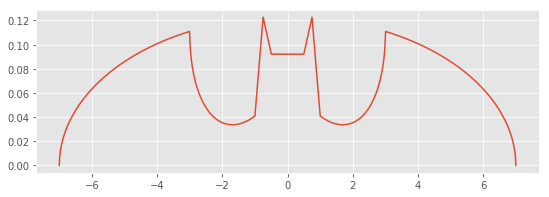

In [13]:
# Let's first test the funciton and see that we can call batman

plt.figure(figsize=(9, 3))
x = np.linspace(-7, 7, 1000)
plt.plot(x, [f(i) for i in x])

In [34]:
%%time
def metropolis(n_steps, sd):
    sampled_values = [] # Collecting every 100th sampled value
    
    # Initiate a random x, uniform (-7, 7)
    x = np.random.uniform(-7, 7)
    
    # Run the iterations
    for t in range(n_steps):
        y = np.random.normal(x, sd)
        h = min(1, f(y)/f(x))
        if h > np.random.uniform():
            x = y
        if t % 100 == 0:
            sampled_values.append(x)
    return sampled_values

sampled_vals = metropolis(1000000, 2)

CPU times: user 3.2 s, sys: 5.28 ms, total: 3.21 s
Wall time: 3.22 s


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


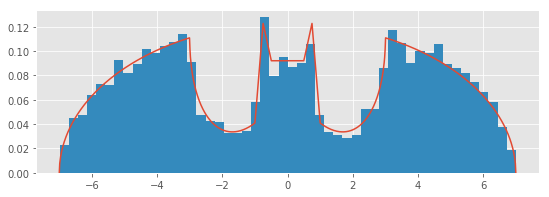

In [35]:
plt.figure(figsize=(9, 3))
x = np.linspace(-7, 7, 1000)
plt.plot(x, [f(i) for i in x])

plt.hist(sampled_vals, bins=50, normed=True)
plt.show()